In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load results

In [2]:
def read_results(results_path):
    results_path = Path(results_path)

    return pd.concat({
        (repeat, path.stem): pd.read_csv(path, index_col=0) 
        for repeat in range(10)
        for path in results_path.glob(f'repeat_{repeat}/*.csv')
    }, names=['Repeat', 'Label', 'entry_name']).reset_index(level=0).groupby(['Repeat', 'Label']).mean().reset_index()


In [3]:
results = pd.concat({
    'ArdiMiPE': read_results('results_ArdiMiPE/'),
    '3-mers': read_results('results_3mers/'),
}, names=['Representation']).reset_index()
results

,Representation,level_1,Repeat,Label,k=3,k=15,k=51
0,ArdiMiPE,0,0,EC number,0.914883,0.880908,0.829131
1,ArdiMiPE,1,0,Family,0.448520,0.320813,0.193733
2,ArdiMiPE,2,0,GO,0.894319,0.870497,0.824470
3,ArdiMiPE,3,0,Gene3D,0.948927,0.928516,0.890073
4,ArdiMiPE,4,0,Genus,0.302548,0.218961,0.144047
...,...,...,...,...,...,...,...
225,3-mers,115,9,Order,0.534976,0.457230,0.352859
226,3-mers,116,9,Pfam,0.724054,0.709558,0.662044
227,3-mers,117,9,Phylum,0.781878,0.739197,0.678163
228,3-mers,118,9,SUPFAM,0.764559,0.748662,0.695634


In [4]:
classificators = results.filter(like='k=').columns.tolist()
classificators

['k=3', 'k=15', 'k=51']

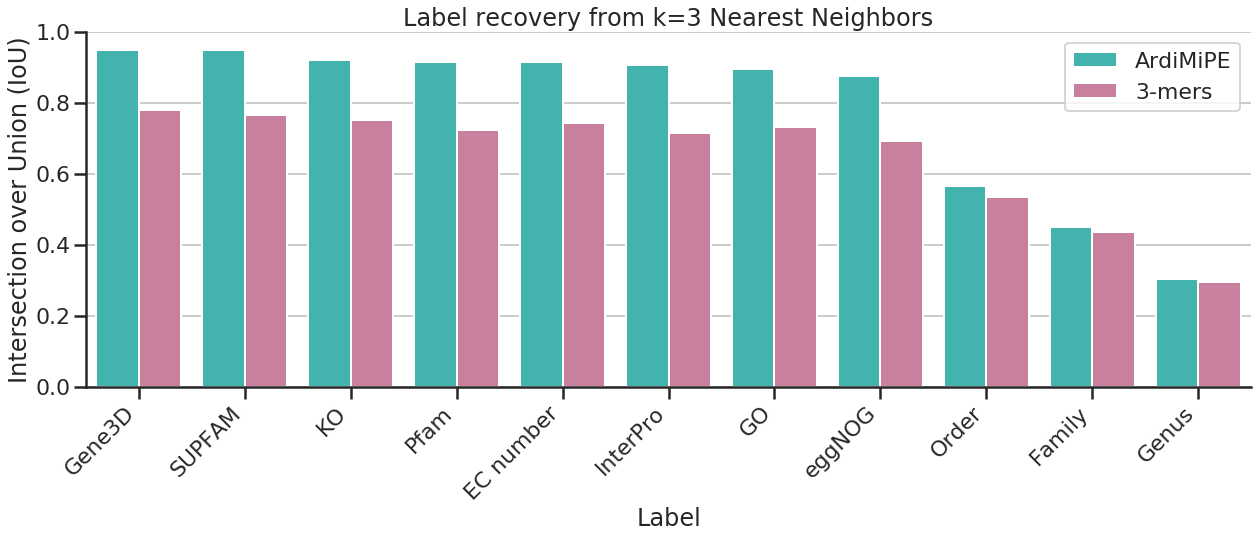

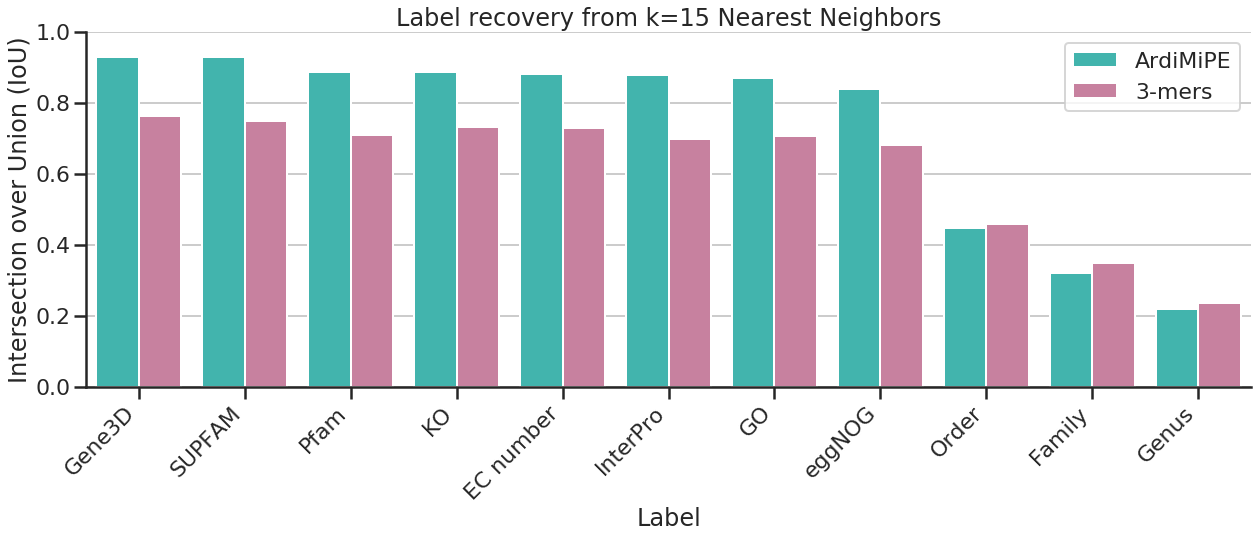

In [ ]:
sns.set(context='poster', style='white')

for classificator in classificators:

    order = (
        results.query('Representation == "ArdiMiPE"')
            .groupby('Label')
            .mean()
            .sort_values(classificator, ascending=False).index
    )

    plt.figure(figsize=(18, 8))
    sns.barplot(
        data=results,
        x='Label',
        y=classificator,
        hue='Representation',
        order=order,
        ci=10,
        palette=["#2fc7bd", "#d3759e"],
    )
    
    
    plt.ylim(0,1)
    plt.ylabel('Intersection over Union (IoU)')
    plt.xticks(rotation=45, ha='right')
    plt.gca().yaxis.tick_left()
    plt.gca().xaxis.tick_bottom()
    
    sns.despine()
    plt.title(f'Label recovery from {classificator} Nearest Neighbors')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()